In [ ]:
import torch
import math
import numpy as np
import pandas as pd
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"


--2022-09-17 12:04:42--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  21.3MB/s    in 0.5s    

2022-09-17 12:04:42 (21.3 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



# 数据分析

### 将xlsx文件转化为csv文件


In [ ]:
import torch
import math
import numpy as np
import pandas as pd
import xlrd
import codecs
import csv

def xlsx_to_csv():
    workbook = xlrd.open_workbook('1.xlsx')
    for i in range(3):
      table = workbook.sheet_by_index(i)
      with codecs.open(str(i)+'.csv', 'w', encoding='utf-8') as f:
          write = csv.writer(f)
          for row_num in range(table.nrows):
              row_value = table.row_values(row_num)
              write.writerow(row_value)
xlsx_to_csv()

In [ ]:
data = pd.read_csv("/content/0.csv")
data.head(5)

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


# 问题1

### 对这些玻璃文物的表面风化与其玻璃类型、纹饰和颜色的关系进行分析

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline


import seaborn as sns

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore') #忽略警告

from tqdm import tqdm
# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
# check data
def show_info(data, is_matrix_transpose=False):
    # dateset shape
    print('data shape is: {}   sample number {}   attribute number {}\n'.format(data.shape, data.shape[0], data.shape[1]))
    # attribute(key)列数和属性名
    print('data columns number {}  \nall columns: {}\n'.format(len(data.columns) ,data.columns))
    # value's null
    print('data all attribute count null:\n', data.isna().sum())
    # data value analysis and data demo
    if is_matrix_transpose:
        print('data value analysis: ', data.describe().T)
        print('data demo without matrix transpose: ', data.head().T)
    else:
        print('data value analysis: ', data.describe())
        print('data demo without matrix transpose: ', data.head())
        
show_info(data)

data shape is: (58, 5)   sample number 58   attribute number 5

data columns number 5  
all columns: Index(['文物编号', '纹饰', '类型', '颜色', '表面风化'], dtype='object')

data all attribute count null:
 文物编号    0
纹饰      0
类型      0
颜色      4
表面风化    0
dtype: int64
data value analysis:              文物编号
count  58.000000
mean   29.500000
std    16.886879
min     1.000000
25%    15.250000
50%    29.500000
75%    43.750000
max    58.000000
data demo without matrix transpose:     文物编号 纹饰  类型  颜色 表面风化
0     1  C  高钾  蓝绿  无风化
1     2  A  铅钡  浅蓝   风化
2     3  A  高钾  蓝绿  无风化
3     4  A  高钾  蓝绿  无风化
4     5  A  高钾  蓝绿  无风化


标签分类

In [ ]:
for i in range(data.shape[0]):
  if(data['表面风化'][i] == '无风化'):
    data['表面风化'][i] = 0
  else:
    data['表面风化'][i] = 1


In [ ]:
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,0
1,2,A,铅钡,浅蓝,1
2,3,A,高钾,蓝绿,0
3,4,A,高钾,蓝绿,0
4,5,A,高钾,蓝绿,0


yes:  30 no:  24


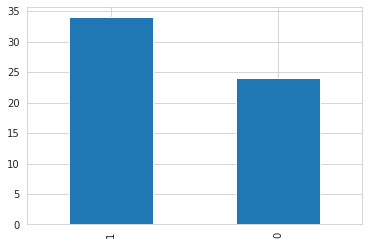

In [ ]:
# label classification
defects_true_false = data.groupby('表面风化')['颜色'].apply(lambda x: x.count())
print('yes: ', defects_true_false[1], 'no: ', defects_true_false[0])
data['表面风化'].value_counts().plot.bar()

In [ ]:
# a = ['纹饰', '类型', '颜色']
data_ = pd.get_dummies(data, sparse = True)
# data_['表面风化'] = data['表面风化'];

In [ ]:
data_

,文物编号,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_0,表面风化_1
0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
1,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,5,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
5,6,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
6,7,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
7,8,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
8,9,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
9,10,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [ ]:
df = data_.corr()
df

,文物编号,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_0,表面风化_1
文物编号,1.000000,-0.036084,-0.304363,0.220532,0.692343,-0.692343,0.090682,0.136509,0.077457,-0.062088,-0.117869,0.201758,-0.422194,0.225776,-0.292759,0.292759
纹饰_A,-0.036084,1.000000,-0.265543,-0.809174,0.063564,-0.063564,-0.182574,0.180451,-0.289617,0.241747,-0.212762,-0.103543,0.025184,0.241747,0.136831,-0.136831
纹饰_B,-0.304363,-0.265543,1.000000,-0.351605,-0.506370,0.506370,-0.079333,-0.246432,-0.125846,-0.064194,-0.092450,-0.044992,0.575125,-0.064194,-0.285391,0.285391
纹饰_C,0.220532,-0.809174,-0.351605,1.000000,0.246885,-0.246885,0.225630,-0.025031,0.357917,-0.195615,0.262937,0.127962,-0.374964,-0.195615,0.041067,-0.041067
类型_铅钡,0.692343,0.063564,-0.506370,0.246885,1.000000,-1.000000,0.156670,0.173036,0.134125,-0.077472,0.182574,0.088852,-0.625120,0.126773,-0.344423,0.344423
类型_高钾,-0.692343,-0.063564,0.506370,-0.246885,-1.000000,1.000000,-0.156670,-0.173036,-0.134125,0.077472,-0.182574,-0.088852,0.625120,-0.126773,0.344423,-0.344423
颜色_浅绿,0.090682,-0.182574,-0.079333,0.225630,0.156670,-0.156670,1.000000,-0.169435,-0.086525,-0.044137,-0.063564,-0.030934,-0.137940,-0.044137,0.119913,-0.119913
颜色_浅蓝,0.136509,0.180451,-0.246432,-0.025031,0.173036,-0.173036,-0.169435,1.000000,-0.268774,-0.137102,-0.197450,-0.096092,-0.428484,-0.137102,-0.020317,0.020317
颜色_深绿,0.077457,-0.289617,-0.125846,0.357917,0.134125,-0.134125,-0.086525,-0.268774,1.000000,-0.070014,-0.100832,-0.049071,-0.218814,-0.070014,0.011117,-0.011117
颜色_深蓝,-0.062088,0.241747,-0.064194,-0.195615,-0.077472,0.077472,-0.044137,-0.137102,-0.070014,1.000000,-0.051434,-0.025031,-0.111618,-0.035714,0.224934,-0.224934


In [ ]:
df.to_excel("./data.xlsx")

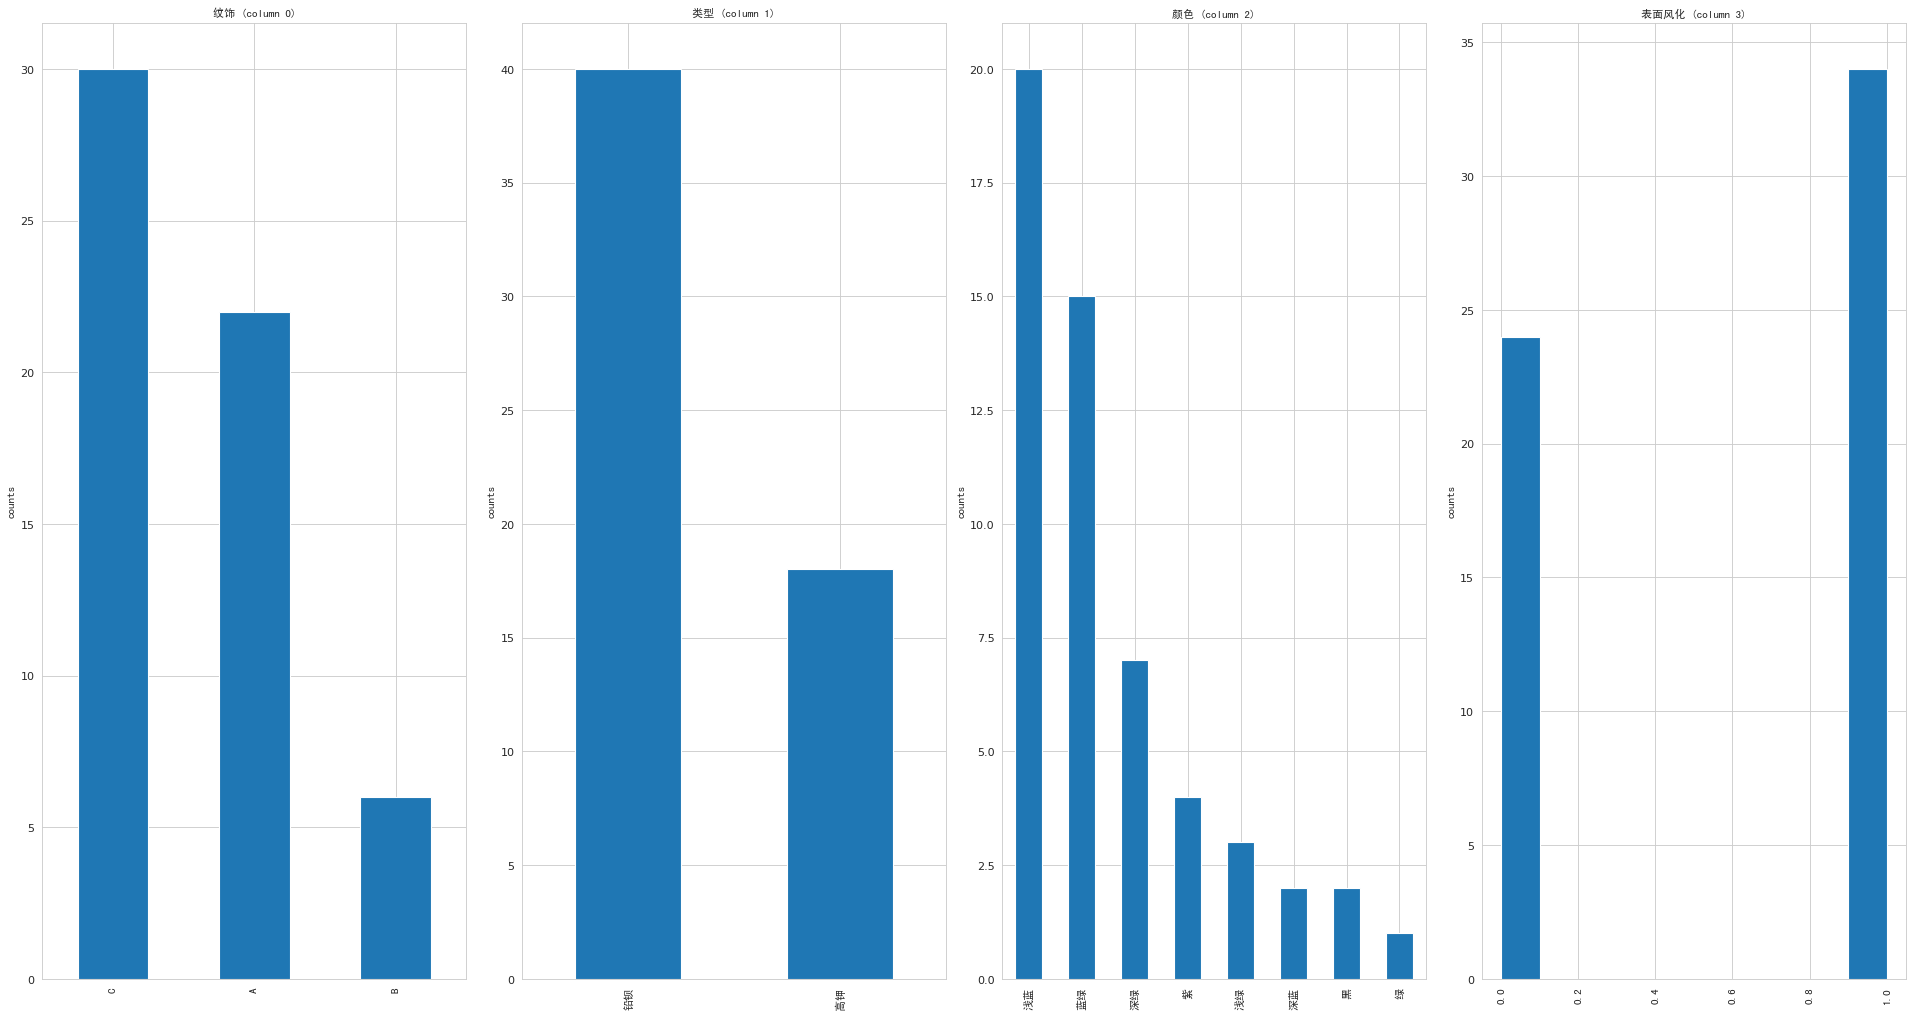

In [ ]:
# plot columns distribution
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()#统计df这个数据集中各个属性的不同值的值
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values（我们选择在1-50之间的值为了方便展示）
    nRow, nCol = df.shape #行和列
    columnNames = list(df) #列的名字
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow #这个公式是什么意思
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k') #作图
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts',fontproperties=zhfont)
        plt.xticks(rotation = 90, fontproperties=zhfont)
        plt.title(f'{columnNames[i]} (column {i})',fontproperties=zhfont)
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)

    plt.show()
    
plotPerColumnDistribution(data, 10, 5)

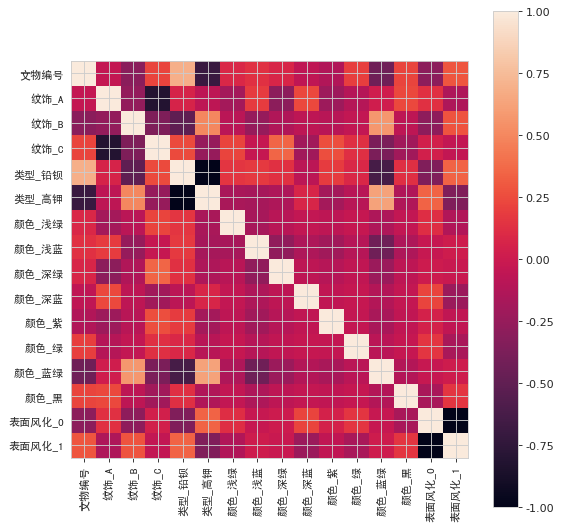

In [ ]:
# plot corr
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontproperties=zhfont)
    plt.yticks(range(len(corr.columns)), corr.columns, fontproperties=zhfont)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

plotCorrelationMatrix(data_, 8)

### 结合玻璃的类型，分析文物样品表面有无风化化学成分含量的统计规律，并根据风化点检测数据,预测其风化前的化学成分含量。

In [ ]:
data1 = pd.read_csv("/content/1.csv")
data1

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54严重风化点,17.11,NaN,NaN,NaN,1.11,3.65,NaN,1.34,58.46,NaN,14.13,1.12,NaN,NaN
65,55,49.01,2.71,NaN,1.13,NaN,1.45,NaN,0.86,32.92,7.95,0.35,NaN,NaN,NaN
66,56,29.15,NaN,NaN,1.21,NaN,1.85,NaN,0.79,41.25,15.45,2.54,NaN,NaN,NaN
67,57,25.42,NaN,NaN,1.31,NaN,2.18,NaN,1.16,45.10,17.30,NaN,NaN,NaN,NaN


In [ ]:
data1.shape

(69, 15)

In [ ]:
from numpy.matrixlib.defmatrix import N
data1.head()
for i in range(data1.shape[0]):
  for j in range(data1.shape[1]-1):
    if not(float(data1.iat[i,j+1]) > 0):
      data1.iat[i, j+1] = 0;
if data1['二氧化硅(SiO2)'][65] > 0:
  print("yes")
else:
  print("no")

data1

yes


,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,02,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,03部位2,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,04,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54严重风化点,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
65,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
66,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
67,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00


In [ ]:
for i in range(data1.shape[0]):
  for j in range(data1.shape[1]-1):
    if float(data1.iat[i,j+1] > 0):
      data1.iat[i, j+1] /= 100;

In [ ]:
data2 = data1
data2.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,0.6933,0.0,0.0999,0.0632,0.0087,0.0393,0.0174,0.0387,0.0000,0.0000,0.0117,0.0000,0.0,0.0039
1,02,0.3628,0.0,0.0105,0.0234,0.0118,0.0573,0.0186,0.0026,0.4743,0.0000,0.0357,0.0019,0.0,0.0000
2,03部位1,0.8705,0.0,0.0519,0.0201,0.0000,0.0406,0.0000,0.0078,0.0025,0.0000,0.0066,0.0000,0.0,0.0000
3,03部位2,0.6171,0.0,0.1237,0.0587,0.0111,0.0550,0.0216,0.0509,0.0141,0.0286,0.0070,0.0010,0.0,0.0000
4,04,0.6588,0.0,0.0967,0.0712,0.0156,0.0644,0.0206,0.0218,0.0000,0.0000,0.0079,0.0000,0.0,0.0036


In [ ]:
data2 = data1.drop(['文物采样点'], axis=1)
list_ = data2.values.tolist()
l1 = list_[41]
l2 = list_[42]
l3 = list_[38]
l4 = list_[39]
l1, l2, l3, l4

([0.6012,
  0.0,
  0.0023,
  0.0089,
  0.0,
  0.027200000000000002,
  0.0,
  0.0301,
  0.1724,
  0.10339999999999999,
  0.0146,
  0.0031,
  0.0,
  0.0366],
 [0.3293,
  0.0138,
  0.0,
  0.0068000000000000005,
  0.0,
  0.025699999999999997,
  0.0029,
  0.0073,
  0.49310000000000004,
  0.09789999999999999,
  0.0048,
  0.0040999999999999995,
  0.0,
  0.0],
 [0.3578,
  0.0,
  0.0025,
  0.0078000000000000005,
  0.0,
  0.016200000000000003,
  0.004699999999999999,
  0.0151,
  0.46549999999999997,
  0.1,
  0.0034000000000000002,
  0.0022,
  0.0,
  0.0],
 [0.6591,
  0.0,
  0.0,
  0.0038,
  0.0,
  0.0144,
  0.0017000000000000001,
  0.0016,
  0.2205,
  0.056799999999999996,
  0.0042,
  0.0,
  0.0,
  0.0])

In [ ]:
data2

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,0.6933,0.0000,0.0999,0.0632,0.0087,0.0393,0.0174,0.0387,0.0000,0.0000,0.0117,0.0000,0.0,0.0039
1,0.3628,0.0000,0.0105,0.0234,0.0118,0.0573,0.0186,0.0026,0.4743,0.0000,0.0357,0.0019,0.0,0.0000
2,0.8705,0.0000,0.0519,0.0201,0.0000,0.0406,0.0000,0.0078,0.0025,0.0000,0.0066,0.0000,0.0,0.0000
3,0.6171,0.0000,0.1237,0.0587,0.0111,0.0550,0.0216,0.0509,0.0141,0.0286,0.0070,0.0010,0.0,0.0000
4,0.6588,0.0000,0.0967,0.0712,0.0156,0.0644,0.0206,0.0218,0.0000,0.0000,0.0079,0.0000,0.0,0.0036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.1711,0.0000,0.0000,0.0000,0.0111,0.0365,0.0000,0.0134,0.5846,0.0000,0.1413,0.0112,0.0,0.0000
65,0.4901,0.0271,0.0000,0.0113,0.0000,0.0145,0.0000,0.0086,0.3292,0.0795,0.0035,0.0000,0.0,0.0000
66,0.2915,0.0000,0.0000,0.0121,0.0000,0.0185,0.0000,0.0079,0.4125,0.1545,0.0254,0.0000,0.0,0.0000
67,0.2542,0.0000,0.0000,0.0131,0.0000,0.0218,0.0000,0.0116,0.4510,0.1730,0.0000,0.0000,0.0,0.0000


In [ ]:
import tensorflow as tf
import numpy as np
import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [242]:
history = LossHistory()

data = np.array([
  l1,
  l4
])
all_y_trues = np.array([
  l2,
  l3
])

inputs = tf.keras.Input(shape=(14,))
x1 = tf.keras.layers.Dense(15, use_bias=True)(inputs)
x2 = tf.keras.layers.Dense(15, use_bias=True)(x1)
x3 = tf.keras.layers.Dense(15, use_bias=True)(x2)
outputs = tf.keras.layers.Dense(14, use_bias=True, activation='sigmoid')(x3)
m = tf.keras.Model(inputs, outputs)

m.compile(tf.keras.optimizers.SGD(learning_rate=0.1), 'mse')
m.fit(data, all_y_trues, epochs=1000, batch_size=1, callbacks=[history])

Epoch 1/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.1993
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1971
Epoch 3/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1949
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1927
Epoch 5/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.1905
Epoch 6/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.1883
Epoch 7/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1862
Epoch 8/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1840
Epoch 9/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1818
Epoch 10/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1796
Epoch 11/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1774
Epoch 12/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1751
Epoch 13/1000
2/2 [==============================

In [243]:
m.summary();

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense_32 (Dense)            (None, 15)                225       
                                                                 
 dense_33 (Dense)            (None, 15)                240       
                                                                 
 dense_34 (Dense)            (None, 15)                240       
                                                                 
 dense_35 (Dense)            (None, 14)                224       
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


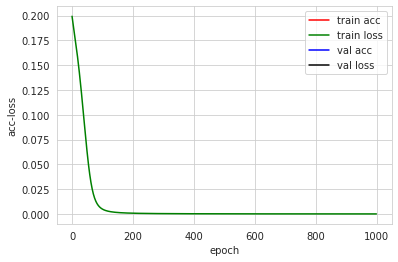

In [244]:
history.loss_plot('epoch')

In [253]:
l_train = np.array([list_[8]])
l_train

array([[0.9263, 0.    , 0.    , 0.0107, 0.    , 0.0198, 0.0017, 0.0324,
        0.    , 0.    , 0.0061, 0.    , 0.    , 0.    ]])

In [254]:
print(m.predict(l_train))

[[0.30869934 0.01128513 0.00595158 0.01047274 0.0100596  0.01508614
  0.012802   0.01242951 0.48736155 0.08693001 0.01114646 0.01095819
  0.00557563 0.00521448]]


下面的就是一个测试kmeans算法，没有用

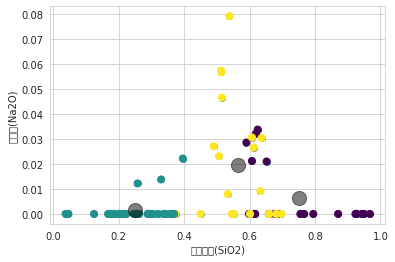

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = data2
import seaborn as sns
sns.regplot(x=df['二氧化硅(SiO2)'], y=df['氧化钠(Na2O)'], fit_reg=False)


from sklearn.cluster import KMeans

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

model = kmeans.fit(df)

predicted_values = kmeans.predict(df)


plt.scatter(df['二氧化硅(SiO2)'], df['氧化钠(Na2O)'], c=predicted_values, s=50, cmap='viridis',)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', alpha=0.5)
plt.show()

# 问题2

### 分类

首先再使用nn来做

In [ ]:
data_

,文物编号,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_0,表面风化_1
0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
1,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,5,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
5,6,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
6,7,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
7,8,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
8,9,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
9,10,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [ ]:
data__ = data_.drop(['类型_高钾'], axis=1)
data__ = data__.drop(['类型_铅钡'], axis=1)
data__ = data__.drop(['表面风化_1'], axis=1)
data__ = data__.drop(['文物编号'], axis=1)
data__ = data__.drop(['表面风化_0'], axis=1)
data___ = data_[['类型_高钾']]
d = data___.values.tolist()
list_ = data__.values.tolist()

In [ ]:
list_ ,d

([[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 

##### nn解决

In [ ]:
history1 = LossHistory()

data = np.array(list_)
all_y_trues = np.array(d)

inputs = tf.keras.Input(shape=(11,))
x1 = tf.keras.layers.Dense(15, use_bias=True)(inputs)
x2 = tf.keras.layers.Dense(15, use_bias=True)(x1)
x3 = tf.keras.layers.Dense(15, use_bias=True)(x2)
outputs = tf.keras.layers.Dense(1, use_bias=True, activation='sigmoid')(x3)
m = tf.keras.Model(inputs, outputs)

m.compile(tf.keras.optimizers.SGD(learning_rate=0.1), 'mse')
m.fit(data, all_y_trues, epochs=1000, batch_size=1, callbacks=[history1])

Epoch 1/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1920
Epoch 2/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1479
Epoch 3/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1405
Epoch 4/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1414
Epoch 5/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1355
Epoch 6/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1364
Epoch 7/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1315
Epoch 8/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1349
Epoch 9/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1329
Epoch 10/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 11/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1327
Epoch 12/1000
58/58 [==============================] - 0s 1ms/step - loss: 0.1319
Epoch 13/1000
58/58 [====

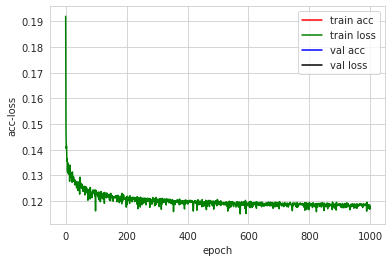

In [ ]:
history1.loss_plot('epoch')

In [ ]:
m.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_24 (Dense)            (None, 15)                180       
                                                                 
 dense_25 (Dense)            (None, 15)                240       
                                                                 
 dense_26 (Dense)            (None, 15)                240       
                                                                 
 dense_27 (Dense)            (None, 1)                 16        
                                                                 
Total params: 676
Trainable params: 676
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l6 = np.array([[0, 0, 1, 1,  0, 0, 0, 0, 0, 0, 0]]);
print(m.predict(l6))

[[0.02372533]]


通过上述的nn，将训练集和测试集按照8:2划分，然后计算准确率

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score


In [ ]:
data_

,文物编号,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_0,表面风化_1
0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
1,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,5,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
5,6,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
6,7,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
7,8,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
8,9,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
9,10,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error
# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']这是一些基本指标
    1. classification report
    2. confusion matrix 混淆矩阵j
    '''
#     y_val = np.reshape(y_val, -1).astype(np.int32)
#     y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
#     accuracy = accuracy_score(y_val, y_pred)
#     precision = precision_score(y_val, y_pred)
#     recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
#     auc = roc_auc_score(y_val, y_pred)
#     print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [ ]:
# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

def metrics_plot(model_name, model, X_val, y_val):
    # plot P-R curve
    disp = plot_precision_recall_curve(model, X_val, y_val)
#     disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

In [ ]:
data_.shape

(58, 16)

In [ ]:

# df_empty = pd.DataFrame(columns=['文物编号', '纹饰_A', '纹饰_B', '纹饰_C','类型_铅钡'
# ,'类型_高钾','颜色_浅绿','颜色_浅蓝','颜色_深绿','颜色_深蓝','颜色_紫','颜色_绿','颜色_蓝绿','颜色_黑','表面风化_0','表面风化_1'])

df = pd.DataFrame(np.arange(58*16).reshape(58,16))
for i in range(data_.shape[0]):
  for j in range(data_.shape[1]):
    if int(data_.iat[i,j]) == 0:
      df.iat[i, j] = 0;
    elif int(data_.iat[i,j]) == 1:
      df.iat[i, j] = 1;
    else:
      df.iat[i, j]= int(data_.iat[i,j])
    


In [ ]:
data_.head()

,文物编号,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_0,表面风化_1
0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
1,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,5,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
1,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,5,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
target = df[5]
data = df.drop([4], axis=1)
data = data.drop([5], axis=1)
data = data.drop([14], axis=1)
data = data.drop([15], axis=1)
data = data.drop([0], axis=1)

X_train , X_val , y_train , y_val = train_test_split(
    data, # 数据
    target, # 所要划分的样本结果

    random_state=7 # 随机数种子，就是随机数的序号，具体是什么我耶不太懂
)
X_train.shape , X_val.shape, y_train.shape , y_val.shape


((43, 11), (15, 11), (43,), (15,))

##### LGBMClassifier解决

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# lightgbm
lgb = LGBMClassifier(
    max_depth=7,
    lambda_l1=0.1,
    lambda_l2=0.01,
    learning_rate=0.01,
    n_estimators=500,
    reg_aplha=1.1,
    colsample_bytree=0.9,
    subsample=0.9,
    n_jobs=5
)
lgb.fit(X_train,y_train, eval_set=[(X_val, y_val)], eval_metric='accuracy', verbose=True, early_stopping_rounds=50)
# predict
y_pred = lgb.predict(X_val)
y_pred

[1]	valid_0's binary_logloss: 0.588637
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.589179
[3]	valid_0's binary_logloss: 0.589728
[4]	valid_0's binary_logloss: 0.590284
[5]	valid_0's binary_logloss: 0.590846
[6]	valid_0's binary_logloss: 0.591414
[7]	valid_0's binary_logloss: 0.591988
[8]	valid_0's binary_logloss: 0.592568
[9]	valid_0's binary_logloss: 0.593153
[10]	valid_0's binary_logloss: 0.593743
[11]	valid_0's binary_logloss: 0.594337
[12]	valid_0's binary_logloss: 0.594937
[13]	valid_0's binary_logloss: 0.595541
[14]	valid_0's binary_logloss: 0.596149
[15]	valid_0's binary_logloss: 0.596761
[16]	valid_0's binary_logloss: 0.597377
[17]	valid_0's binary_logloss: 0.597997
[18]	valid_0's binary_logloss: 0.59862
[19]	valid_0's binary_logloss: 0.599246
[20]	valid_0's binary_logloss: 0.599875
[21]	valid_0's binary_logloss: 0.600508
[22]	valid_0's binary_logloss: 0.601143
[23]	valid_0's binary_logloss: 0.60178
[24]	valid_0's binary_logloss

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
metrics_calculate('Boosting lightgbm', y_val, y_pred)

Boosting lightgbm classification report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       0.00      0.00      0.00         4

    accuracy                           0.73        15
   macro avg       0.37      0.50      0.42        15
weighted avg       0.54      0.73      0.62        15

Boosting lightgbm confusion_matrix:
 [[11  0]
 [ 4  0]]

Boosting lightgbm FNR:1.00000000 FPR:0.00000000
Boosting lightgbm accuracy:0.73333333


##### CatBoostClassifier解决

In [ ]:
cb = CatBoostClassifier(
    depth = 9, 
    reg_lambda=0.1,
    learning_rate = 0.09,
    iterations = 500
)

In [ ]:
# fit
cb.fit(X_train, y_train, eval_set=[(X_val, y_val)],  verbose=True, early_stopping_rounds=50)
# predict
y_pred = cb.predict(X_val)
# evaluate
metrics_calculate('Catboost', y_val, y_pred)

0:	learn: 0.6134376	test: 0.6498536	best: 0.6498536 (0)	total: 1.03ms	remaining: 516ms
1:	learn: 0.5180942	test: 0.6246762	best: 0.6246762 (1)	total: 1.14ms	remaining: 285ms
2:	learn: 0.3953401	test: 0.5850276	best: 0.5850276 (2)	total: 1.32ms	remaining: 219ms
3:	learn: 0.3500463	test: 0.5836681	best: 0.5836681 (3)	total: 1.53ms	remaining: 190ms
4:	learn: 0.3203725	test: 0.5879156	best: 0.5836681 (3)	total: 1.63ms	remaining: 162ms
5:	learn: 0.2958112	test: 0.6049134	best: 0.5836681 (3)	total: 1.76ms	remaining: 145ms
6:	learn: 0.2645312	test: 0.6250166	best: 0.5836681 (3)	total: 1.85ms	remaining: 130ms
7:	learn: 0.2429124	test: 0.6208178	best: 0.5836681 (3)	total: 1.97ms	remaining: 121ms
8:	learn: 0.2223846	test: 0.6455216	best: 0.5836681 (3)	total: 2.06ms	remaining: 113ms
9:	learn: 0.2179700	test: 0.6472269	best: 0.5836681 (3)	total: 2.13ms	remaining: 105ms
10:	learn: 0.2103847	test: 0.6664520	best: 0.5836681 (3)	total: 2.2ms	remaining: 97.9ms
11:	learn: 0.2034496	test: 0.6965086	best:

##### XGBClassifier解决

In [ ]:
%%time

# xgboost
xgb = XGBClassifier(
    max_depth=9,
    learning_rate=0.01,
    n_estimators=500,
    reg_alpha=1.1,
    colsample_bytree = 0.9, 
    subsample = 0.9,
    n_jobs = 5
)
# cv = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

CPU times: user 49 µs, sys: 0 ns, total: 49 µs
Wall time: 52.5 µs


In [ ]:
# fit
%time xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True, early_stopping_rounds=2)
# pred
y_pred = xgb.predict(X_val)
# evaluate
metrics_calculate('Boosting xgboost', y_val, y_pred)

[0]	validation_0-error:0.266667
Will train until validation_0-error hasn't improved in 2 rounds.
[1]	validation_0-error:0.266667
[2]	validation_0-error:0.266667
Stopping. Best iteration:
[0]	validation_0-error:0.266667

CPU times: user 18.2 ms, sys: 3.14 ms, total: 21.4 ms
Wall time: 28.3 ms
Boosting xgboost classification report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.50      0.25      0.33         4

    accuracy                           0.73        15
   macro avg       0.63      0.58      0.58        15
weighted avg       0.70      0.73      0.70        15

Boosting xgboost confusion_matrix:
 [[10  1]
 [ 3  1]]

Boosting xgboost FNR:0.75000000 FPR:0.09090909
Boosting xgboost accuracy:0.73333333


##### 三种机器学习效果的比较

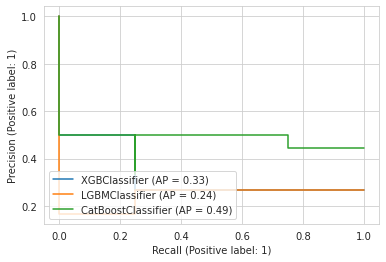

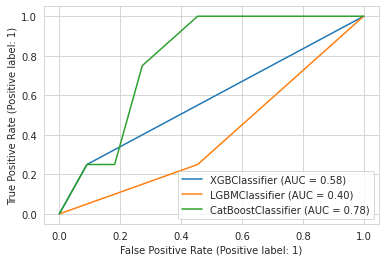

In [ ]:
# compare boosting [P-R curve]
PR_curve = plot_precision_recall_curve(xgb, X_val, y_val)
PR_curve = plot_precision_recall_curve(lgb, X_val, y_val, ax=PR_curve.ax_)
PR_curve = plot_precision_recall_curve(cb, X_val, y_val, ax=PR_curve.ax_)
# compare boosting [ROC curve]
ROC_curve = plot_roc_curve(xgb, X_val, y_val)
ROC_curve = plot_roc_curve(lgb, X_val, y_val, ax=ROC_curve.ax_)
ROC_curve = plot_roc_curve(cb, X_val, y_val, ax=ROC_curve.ax_)

In [ ]:
data1['类'] = 0
int(data1.iat[1,0][0:2])
data1
data1.shape

(69, 16)

In [ ]:
for i in range(data1.shape[0]):
  data1.iat[i, 15] = data_.iat[int(data1.iat[i,0][0:2])-1,4]

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   文物采样点        69 non-null     object 
 1   二氧化硅(SiO2)   69 non-null     float64
 2   氧化钠(Na2O)    69 non-null     float64
 3   氧化钾(K2O)     69 non-null     float64
 4   氧化钙(CaO)     69 non-null     float64
 5   氧化镁(MgO)     69 non-null     float64
 6   氧化铝(Al2O3)   69 non-null     float64
 7   氧化铁(Fe2O3)   69 non-null     float64
 8   氧化铜(CuO)     69 non-null     float64
 9   氧化铅(PbO)     69 non-null     float64
 10  氧化钡(BaO)     69 non-null     float64
 11  五氧化二磷(P2O5)  69 non-null     float64
 12  氧化锶(SrO)     69 non-null     float64
 13  氧化锡(SnO2)    69 non-null     float64
 14  二氧化硫(SO2)    69 non-null     float64
 15  类            69 non-null     int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 8.8+ KB


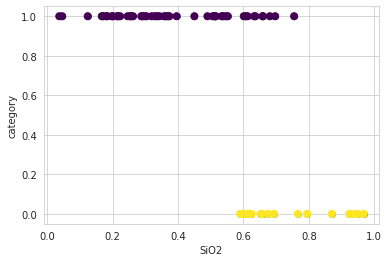

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = data1
df = df.drop(['文物采样点'], axis=1)
import seaborn as sns
sns.regplot(x=df['二氧化硅(SiO2)'], y=df['类'], fit_reg=False)


from sklearn.cluster import KMeans

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)

model = kmeans.fit(df)

predicted_values = kmeans.predict(df)

plt.xlabel('SiO2')
plt.ylabel('category')
plt.scatter(df['二氧化硅(SiO2)'], df['类'], c=predicted_values, s=50, cmap='viridis',)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', alpha=0.5)
plt.show()

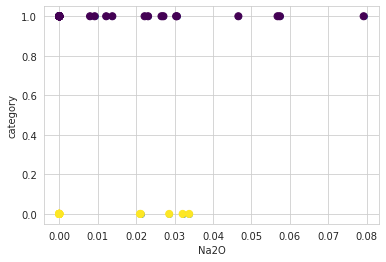

In [ ]:
sns.regplot(x=df['氧化钠(Na2O)'], y=df['类'], fit_reg=False)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)

model = kmeans.fit(df)

predicted_values = kmeans.predict(df)

plt.xlabel('Na2O')
plt.ylabel('category')
plt.scatter(df['氧化钠(Na2O)'], df['类'], c=predicted_values, s=50, cmap='viridis',)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', alpha=0.5)
plt.show()

In [ ]:
def draw(df, str1, str2, str3):
  sns.regplot(x=df[str1], y=df[str2], fit_reg=False)
  kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
  model = kmeans.fit(df)
  predicted_values = kmeans.predict(df)
  plt.xlabel(str3)
  plt.ylabel('category')
  plt.scatter(df[str1], df[str2], c=predicted_values, s=50, cmap='viridis',)
  # plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', alpha=0.5)
  plt.show()

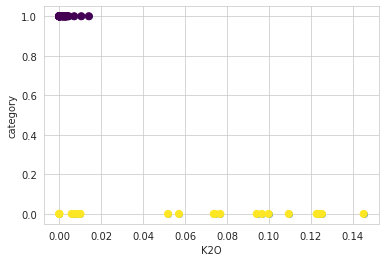

In [ ]:
draw(df, '氧化钾(K2O)', '类', 'K2O')

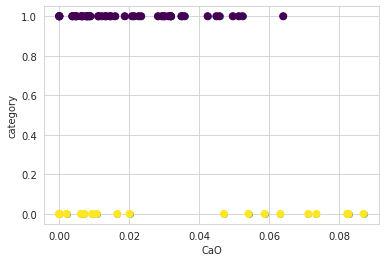

In [ ]:
draw(df, '氧化钙(CaO)', '类', 'CaO')

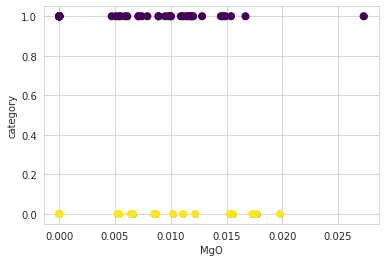

In [ ]:
draw(df, '氧化镁(MgO)', '类', 'MgO')

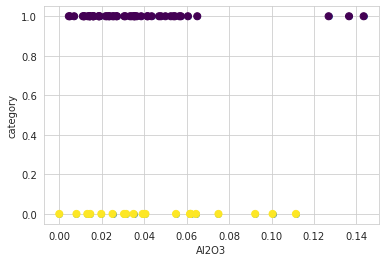

In [ ]:
draw(df, '氧化铝(Al2O3)', '类', 'Al2O3')

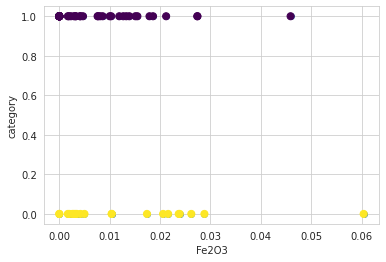

In [ ]:
draw(df, '氧化铁(Fe2O3)', '类', 'Fe2O3')

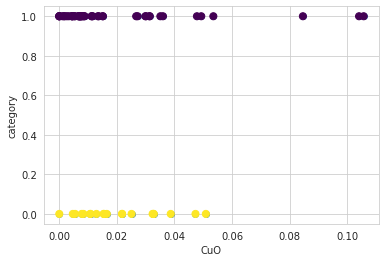

In [ ]:
draw(df, '氧化铜(CuO)', '类', 'CuO')

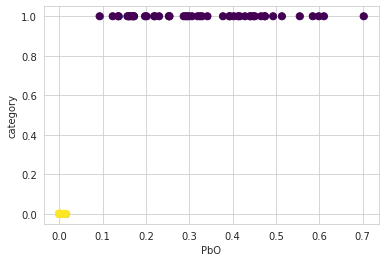

In [ ]:
draw(df, '氧化铅(PbO)', '类', 'PbO')

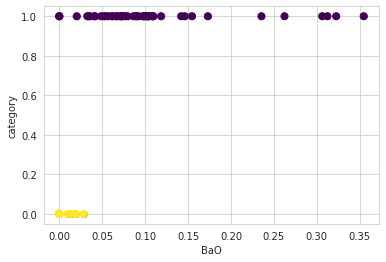

In [ ]:
draw(df, '氧化钡(BaO)', '类', 'BaO')

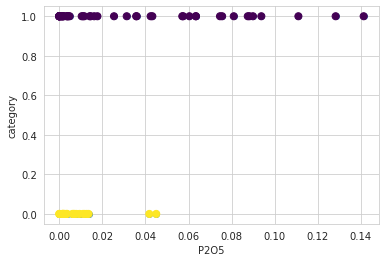

In [ ]:
draw(df, '五氧化二磷(P2O5)', '类', 'P2O5')

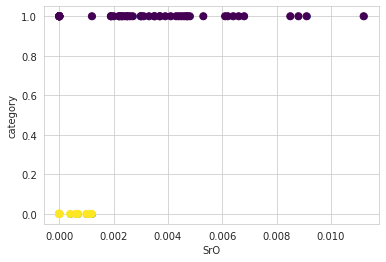

In [ ]:
draw(df, '氧化锶(SrO)', '类', 'SrO')

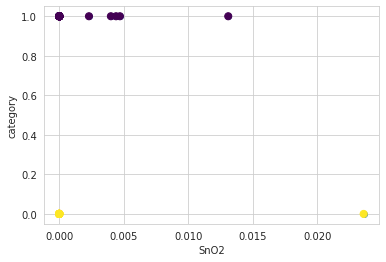

In [ ]:
draw(df, '氧化锡(SnO2)', '类', 'SnO2')

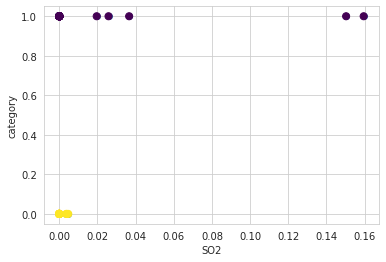

In [ ]:
draw(df, '二氧化硫(SO2)', '类', 'SO2')

# 问题3

### 分类

#### nn解决

In [ ]:
df

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类
0,0.6933,0.0000,0.0999,0.0632,0.0087,0.0393,0.0174,0.0387,0.0000,0.0000,0.0117,0.0000,0.0,0.0039,0
1,0.3628,0.0000,0.0105,0.0234,0.0118,0.0573,0.0186,0.0026,0.4743,0.0000,0.0357,0.0019,0.0,0.0000,1
2,0.8705,0.0000,0.0519,0.0201,0.0000,0.0406,0.0000,0.0078,0.0025,0.0000,0.0066,0.0000,0.0,0.0000,0
3,0.6171,0.0000,0.1237,0.0587,0.0111,0.0550,0.0216,0.0509,0.0141,0.0286,0.0070,0.0010,0.0,0.0000,0
4,0.6588,0.0000,0.0967,0.0712,0.0156,0.0644,0.0206,0.0218,0.0000,0.0000,0.0079,0.0000,0.0,0.0036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.1711,0.0000,0.0000,0.0000,0.0111,0.0365,0.0000,0.0134,0.5846,0.0000,0.1413,0.0112,0.0,0.0000,1
65,0.4901,0.0271,0.0000,0.0113,0.0000,0.0145,0.0000,0.0086,0.3292,0.0795,0.0035,0.0000,0.0,0.0000,1
66,0.2915,0.0000,0.0000,0.0121,0.0000,0.0185,0.0000,0.0079,0.4125,0.1545,0.0254,0.0000,0.0,0.0000,1
67,0.2542,0.0000,0.0000,0.0131,0.0000,0.0218,0.0000,0.0116,0.4510,0.1730,0.0000,0.0000,0.0,0.0000,1


In [ ]:
res = df[['类']].values.tolist()
list_ = df.drop(['类'],axis = 1).values.tolist()


In [ ]:
len(list_[0])

14

In [ ]:
history1 = LossHistory()

data = np.array(list_)
all_y_trues = np.array(res)

inputs = tf.keras.Input(shape=(14,))
x1 = tf.keras.layers.Dense(15, use_bias=True)(inputs)
x2 = tf.keras.layers.Dense(15, use_bias=True)(x1)
x3 = tf.keras.layers.Dense(15, use_bias=True)(x2)
outputs = tf.keras.layers.Dense(1, use_bias=True, activation='sigmoid')(x3)
m2 = tf.keras.Model(inputs, outputs)

m2.compile(tf.keras.optimizers.SGD(learning_rate=0.1), 'mse')
m2.fit(data, all_y_trues, epochs=100, batch_size=1, callbacks=[history1])

Epoch 1/100
69/69 [==============================] - 0s 895us/step - loss: 0.2043
Epoch 2/100
69/69 [==============================] - 0s 856us/step - loss: 0.1130
Epoch 3/100
69/69 [==============================] - 0s 843us/step - loss: 0.0677
Epoch 4/100
69/69 [==============================] - 0s 846us/step - loss: 0.0365
Epoch 5/100
69/69 [==============================] - 0s 847us/step - loss: 0.0327
Epoch 6/100
69/69 [==============================] - 0s 928us/step - loss: 0.0204
Epoch 7/100
69/69 [==============================] - 0s 844us/step - loss: 0.0164
Epoch 8/100
69/69 [==============================] - 0s 990us/step - loss: 0.0238
Epoch 9/100
69/69 [==============================] - 0s 915us/step - loss: 0.0040
Epoch 10/100
69/69 [==============================] - 0s 871us/step - loss: 0.0054
Epoch 11/100
69/69 [==============================] - 0s 852us/step - loss: 0.0020
Epoch 12/100
69/69 [==============================] - 0s 889us/step - loss: 9.1232e-04
Epoch 18/

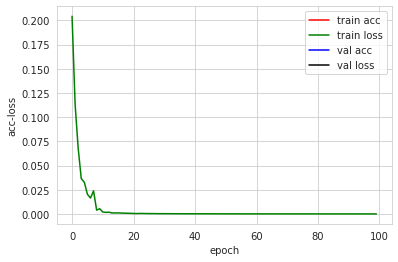

In [ ]:
history1.loss_plot('epoch')

In [ ]:
l6 = np.array([list_[0]]);

In [ ]:
l = m2.predict(l6)
l

array([[0.00167623]], dtype=float32)

In [ ]:
data_res = pd.read_csv('./2.csv')
for i in range(data_res.shape[0]):
  for j in range(data_res.shape[1]-2):
    if not data_res.iat[i,j+2] > 0:
      data_res.iat[i,j+2] = 0
    else:
      data_res.iat[i,j+2] /= 100

In [ ]:
data_res

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,0.7845,0.000,0.0000,0.0608,0.0186,0.0723,0.0215,0.0211,0.0000,0.0000,0.0106,0.0003,0.0000,0.0051
1,A2,风化,0.3775,0.000,0.0000,0.0763,0.0000,0.0233,0.0000,0.0000,0.3430,0.0000,0.1427,0.0000,0.0000,0.0000
2,A3,无风化,0.3195,0.000,0.0136,0.0719,0.0081,0.0293,0.0706,0.0021,0.3958,0.0469,0.0268,0.0052,0.0000,0.0000
3,A4,无风化,0.3547,0.000,0.0079,0.0289,0.0105,0.0707,0.0645,0.0096,0.2428,0.0831,0.0845,0.0028,0.0000,0.0000
4,A5,风化,0.6429,0.012,0.0037,0.0164,0.0234,0.1275,0.0081,0.0094,0.1223,0.0216,0.0019,0.0021,0.0049,0.0000
5,A6,风化,0.9317,0.000,0.0135,0.0064,0.0021,0.0152,0.0027,0.0173,0.0000,0.0000,0.0021,0.0000,0.0000,0.0000
6,A7,风化,0.9083,0.000,0.0098,0.0112,0.0000,0.0506,0.0024,0.0117,0.0000,0.0000,0.0013,0.0000,0.0000,0.0011
7,A8,无风化,0.5112,0.000,0.0023,0.0089,0.0000,0.0212,0.0000,0.0901,0.2124,0.1134,0.0146,0.0031,0.0000,0.0226


In [ ]:
data_res = data_res.drop(['文物编号'], axis=1)
data_res = data_res.drop(['表面风化'], axis=1)
d = data_res.values.tolist()
d

In [ ]:
list__ = []
for i in range(len(d)):
  l = np.array([d[i]]);
  l = m2.predict(l)
  list__.append(l)

In [ ]:
list__

[array([[0.00468427]], dtype=float32),
 array([[0.9999997]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.9999971]], dtype=float32),
 array([[0.96470165]], dtype=float32),
 array([[0.00128266]], dtype=float32),
 array([[0.00209573]], dtype=float32),
 array([[0.9999324]], dtype=float32)]

In [ ]:
data_res['种类（靠近0为高锰，1为铅钡）'] = list__

In [ ]:
data_res

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),种类（靠近0为高锰，1为铅钡）
0,0.7845,0.000,0.0000,0.0608,0.0186,0.0723,0.0215,0.0211,0.0000,0.0000,0.0106,0.0003,0.0000,0.0051,[[0.0046842694]]
1,0.3775,0.000,0.0000,0.0763,0.0000,0.0233,0.0000,0.0000,0.3430,0.0000,0.1427,0.0000,0.0000,0.0000,[[0.9999997]]
2,0.3195,0.000,0.0136,0.0719,0.0081,0.0293,0.0706,0.0021,0.3958,0.0469,0.0268,0.0052,0.0000,0.0000,[[1.0]]
3,0.3547,0.000,0.0079,0.0289,0.0105,0.0707,0.0645,0.0096,0.2428,0.0831,0.0845,0.0028,0.0000,0.0000,[[0.9999971]]
4,0.6429,0.012,0.0037,0.0164,0.0234,0.1275,0.0081,0.0094,0.1223,0.0216,0.0019,0.0021,0.0049,0.0000,[[0.96470165]]
5,0.9317,0.000,0.0135,0.0064,0.0021,0.0152,0.0027,0.0173,0.0000,0.0000,0.0021,0.0000,0.0000,0.0000,[[0.0012826622]]
6,0.9083,0.000,0.0098,0.0112,0.0000,0.0506,0.0024,0.0117,0.0000,0.0000,0.0013,0.0000,0.0000,0.0011,[[0.002095729]]
7,0.5112,0.000,0.0023,0.0089,0.0000,0.0212,0.0000,0.0901,0.2124,0.1134,0.0146,0.0031,0.0000,0.0226,[[0.9999324]]


In [ ]:
data_res.to_excel('./2.xlsx')

# 问题4

针对不同类别的玻璃文物样品，分析其化学成分之间的关联关系，并比较不同类
别之间的化学成分关联关系的差异性。


### 分析其化学成分之间的关联关系

热力图直观明了

In [ ]:
data1

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类
0,01,0.6933,0.0000,0.0999,0.0632,0.0087,0.0393,0.0174,0.0387,0.0000,0.0000,0.0117,0.0000,0.0,0.0039,0
1,02,0.3628,0.0000,0.0105,0.0234,0.0118,0.0573,0.0186,0.0026,0.4743,0.0000,0.0357,0.0019,0.0,0.0000,1
2,03部位1,0.8705,0.0000,0.0519,0.0201,0.0000,0.0406,0.0000,0.0078,0.0025,0.0000,0.0066,0.0000,0.0,0.0000,0
3,03部位2,0.6171,0.0000,0.1237,0.0587,0.0111,0.0550,0.0216,0.0509,0.0141,0.0286,0.0070,0.0010,0.0,0.0000,0
4,04,0.6588,0.0000,0.0967,0.0712,0.0156,0.0644,0.0206,0.0218,0.0000,0.0000,0.0079,0.0000,0.0,0.0036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54严重风化点,0.1711,0.0000,0.0000,0.0000,0.0111,0.0365,0.0000,0.0134,0.5846,0.0000,0.1413,0.0112,0.0,0.0000,1
65,55,0.4901,0.0271,0.0000,0.0113,0.0000,0.0145,0.0000,0.0086,0.3292,0.0795,0.0035,0.0000,0.0,0.0000,1
66,56,0.2915,0.0000,0.0000,0.0121,0.0000,0.0185,0.0000,0.0079,0.4125,0.1545,0.0254,0.0000,0.0,0.0000,1
67,57,0.2542,0.0000,0.0000,0.0131,0.0000,0.0218,0.0000,0.0116,0.4510,0.1730,0.0000,0.0000,0.0,0.0000,1


使用groupby方法拆分data1

In [ ]:
groups = data1.groupby(data1['类'])
data11 = groups.get_group(1)
data12 = groups.get_group(0)

如下图所示的是铅钡的化学成分的关系

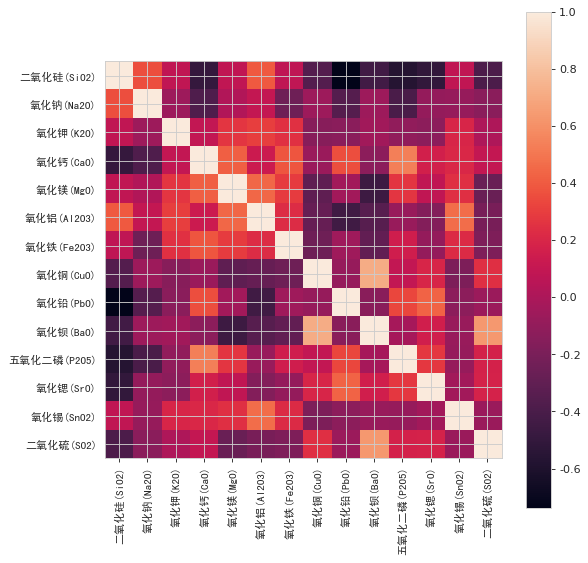

In [ ]:
plotCorrelationMatrix(data11, 8)

如下图所示的是高锰的化学成分的关系

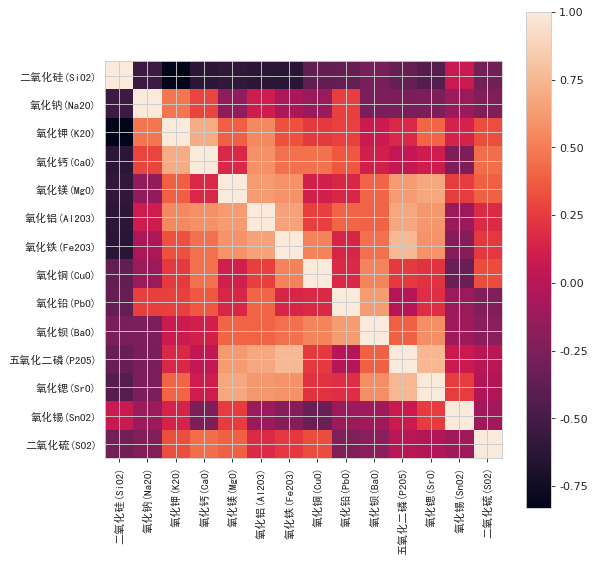

In [ ]:
plotCorrelationMatrix(data12, 8)